##Beer Consumption - Sao Paulo

Beer is one of the most democratic and consumed drinks in the world. Not without reason, it is perfect for almost every situation, from happy hour to large wedding parties. If you just think about it, you already feel like having a beer, you’re not alone.

The objective of this work will be to demonstrate the impacts of variables on beer consumption in a given region and the consumption forecast for certain scenarios. The data (sample) were collected in São Paulo — Brazil, in a university area, where there are some parties with groups of students from 18 to 28 years of age (average).

###Importar Data

In [0]:
import pandas as pd

In [97]:
df = pd.read_csv("Consumo_cerveja(2).csv",decimal=',')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


###Limpieza de Datos

In [0]:
del df['Data']

In [102]:
df.head()

,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,27.30,23.9,32.5,0.0,0.0,25.461
1,27.02,24.5,33.5,0.0,0.0,28.972
2,24.82,22.4,29.9,0.0,1.0,30.814
3,23.98,21.5,28.6,1.2,1.0,29.799
4,23.82,21.0,28.3,0.0,0.0,28.900


In [0]:
df = df.dropna()

In [0]:
df['Consumo de cerveja (litros)']=df['Consumo de cerveja (litros)'].astype(float)

###Outliers

####RIQ

In [105]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Temperatura Media (C)          4.260
Temperatura Minima (C)         4.300
Temperatura Maxima (C)         5.600
Precipitacao (mm)              3.200
Final de Semana                1.000
Consumo de cerveja (litros)    6.623
dtype: float64


In [0]:
df_modificado = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

####Z-Score

In [0]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))

In [0]:
df_z = df[(z < 3).all(axis=1)]

####Tamaño Data

In [122]:
df.shape

(365, 6)

In [123]:
df_modificado.shape #RIQ

(300, 6)

In [124]:
df_z.shape

(357, 6)

###Evaluación Cross Validation

In [0]:
X = df_z.drop(["Consumo de cerveja (litros)"],axis=1)
y = df_z['Consumo de cerveja (litros)']

In [117]:
from sklearn.model_selection import KFold
from sklearn import metrics
NSplits = 10
kf = KFold(n_splits=NSplits)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=10, random_state=None, shuffle=False)


In [118]:
AccTotal = 0
for train_index, test_index in kf.split(X):
  #print("TRAIN:", train_index, "TEST:", test_index)
  X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
  y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
  
  reg = LinearRegression()
  reg.fit(X_train_cv,y_train_cv)

  AccFolder = reg.score(X_test_cv, y_test_cv)*100
  print("Accuracy Folder", AccFolder)
  
  AccTotal += AccFolder
  
print("Accuracy General:", AccTotal/NSplits)

Accuracy Folder 59.98651173448755
Accuracy Folder 34.797356491294806
Accuracy Folder 66.05884092150053
Accuracy Folder 62.83118458440819
Accuracy Folder 80.92890467328608
Accuracy Folder 76.30083079435141
Accuracy Folder 71.17120092317664
Accuracy Folder 59.39096603572581
Accuracy Folder 51.55109245151461
Accuracy Folder 59.71177771511278
Accuracy General: 62.27286663248585


df-> 62.73

df_modificado -> 63.45

df_z -> 62.27

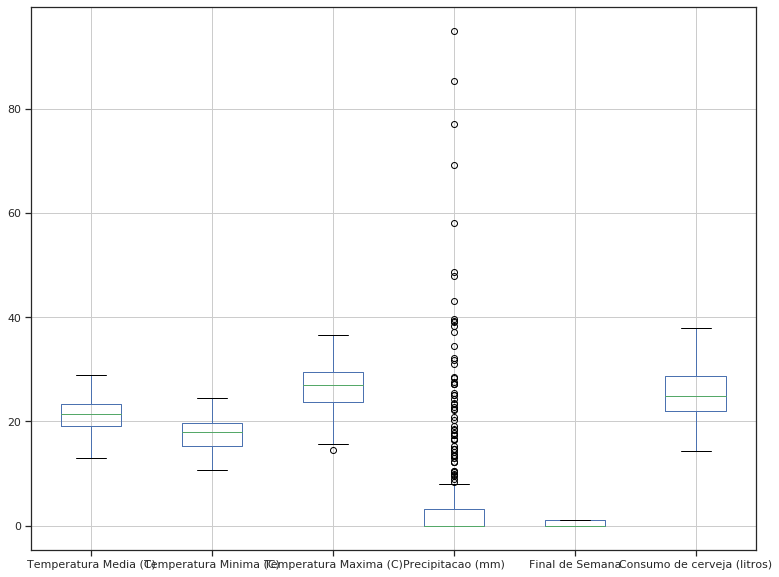

In [100]:
df.boxplot(figsize=(13,10))